In [1]:
from datetime import datetime
from repetition import pp
from repetition import LearningTracker

# create a learning tracker
lt = LearningTracker(
    epoch=datetime.now(),
)
print("Scheduled as dates")
pp(lt.schedule())
hdl, _ = lt.reference.plot_graph()
hdl.ppd.plot.savefig("quickstart_reference.svg")
hdl.ppd.plot.savefig("quickstart_reference.pdf")
#hdl.save_fig("results/quickstart_reference.svg")

Scheduled as dates
[ datetime.datetime(2018, 12, 26, 9, 13, 3, 406330),
  datetime.datetime(2018, 12, 26, 20, 13, 56, 191344),
  datetime.datetime(2018, 12, 27, 6, 42, 11, 4502),
  datetime.datetime(2018, 12, 27, 17, 47, 22, 214043),
  datetime.datetime(2018, 12, 28, 6, 22, 9, 490215),
  datetime.datetime(2018, 12, 28, 21, 38, 43, 319256),
  datetime.datetime(2018, 12, 29, 17, 52, 6, 700962),
  datetime.datetime(2018, 12, 31, 0, 28, 22, 423689),
  datetime.datetime(2019, 1, 2, 12, 4, 17, 97047),
  datetime.datetime(2019, 1, 11, 12, 10, 10, 677480)]


Scheduled as dates
[ datetime.datetime(2018, 12, 27, 4, 25, 3, 400381),
  datetime.datetime(2018, 12, 27, 15, 51, 11, 460145),
  datetime.datetime(2018, 12, 28, 4, 11, 32, 622896),
  datetime.datetime(2018, 12, 28, 18, 51, 12, 29101),
  datetime.datetime(2018, 12, 29, 14, 7, 29, 909728),
  datetime.datetime(2018, 12, 30, 19, 27, 57, 121306),
  datetime.datetime(2019, 1, 2, 6, 16, 12, 537315),
  datetime.datetime(2019, 1, 12, 2, 39, 44, 845384),
  datetime.datetime(2018, 12, 26, 16, 18, 41, 957418),
  datetime.datetime(2018, 12, 27, 3, 44, 50, 17181),
  datetime.datetime(2018, 12, 27, 16, 5, 11, 179932),
  datetime.datetime(2018, 12, 28, 6, 44, 50, 586137),
  datetime.datetime(2018, 12, 29, 2, 1, 8, 466765),
  datetime.datetime(2018, 12, 30, 7, 21, 35, 678342),
  datetime.datetime(2019, 1, 1, 18, 9, 51, 94352),
  datetime.datetime(2019, 1, 11, 14, 33, 23, 402421)]


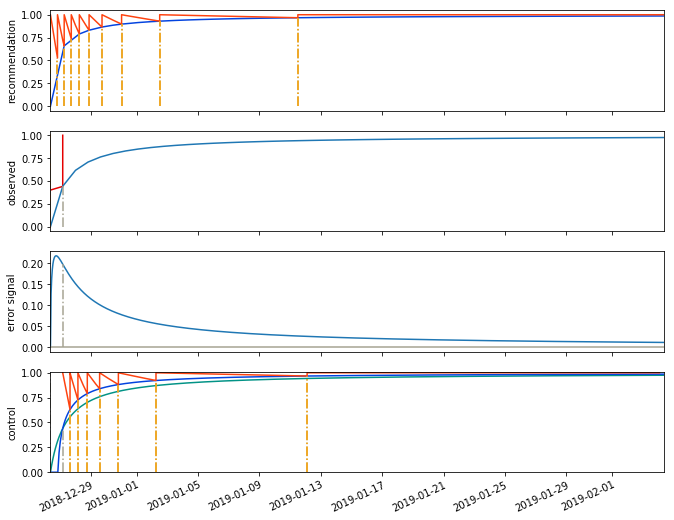

In [2]:
days_since_training_epoch = 0.0
lt.learned(result=0.40, when=days_since_training_epoch)
days_since_training_epoch = 0.8
lt.learned(result=0.44, when=days_since_training_epoch)
print("Scheduled as dates")
pp(lt.schedule())
hdl, _ = lt.plot_graphs()

lt.save_figure("quickstart_control_after_two_events.png")
lt.save_figure("quickstart_control_after_two_events.pdf")


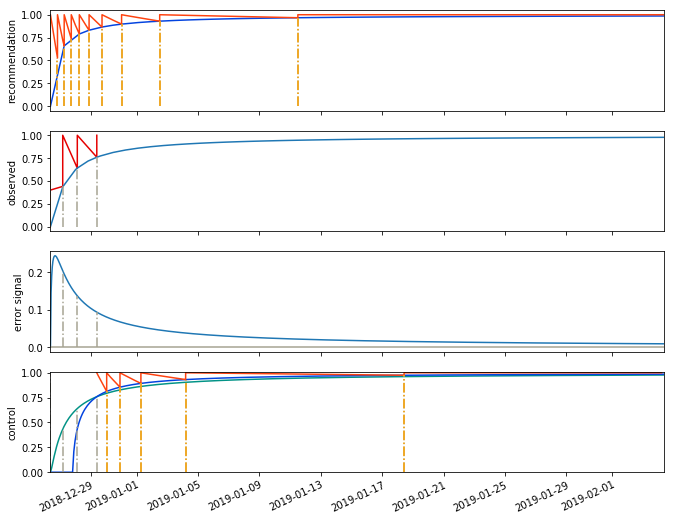

In [3]:
# students tests themselves 1.75 days after they start training
# they recall about 64 percent of the thing they are studying
days_since_training_epoch = 1.75
lt.learned(result=0.64, when=days_since_training_epoch)
# the student reviews their material until 
# they have a perfect recollection

# students tests themselves 3.02 days after they start training
# they recall about 76 percent of the thing they are studying
days_since_training_epoch = 3.02
lt.learned(result=0.76, when=days_since_training_epoch)
# the student reviews their material until 
# they have a perfect recollection
lt.plot_graphs()
lt.save_figure("quickstart_control_after_four_events.png")
lt.save_figure("quickstart_control_after_four_events.pdf")

[datetime.datetime(2019, 1, 24, 9, 13, 3, 400381), datetime.datetime(2019, 1, 22, 23, 4, 40, 448507)]


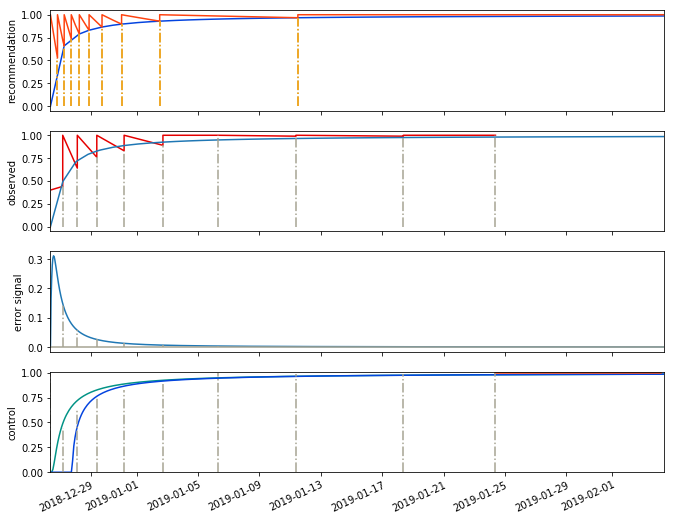

In [4]:
results = [ 
    [4.8,  7.33, 10.93, 16.00, 23.00, 29.00],
    [0.83, 0.89,  1.00,  0.99, 0.99,   1.00],
  ]

for dsi, r in zip(*results):
  days_since_training_epoch, result = dsi, r
  lt.learned(result=result, when=days_since_training_epoch)

print(lt.schedule())

# import pdb; pdb.set_trace()
hdl, _ = lt.plot_graphs()

lt.save_figure("./quickstart_control_after_ten_events.png")
lt.save_figure("./quickstart_control_after_ten_events.pdf")

In [5]:
for i, r in zip(*results):
    print(i)

4.8
7.33
10.93
16.0
23.0
29.0


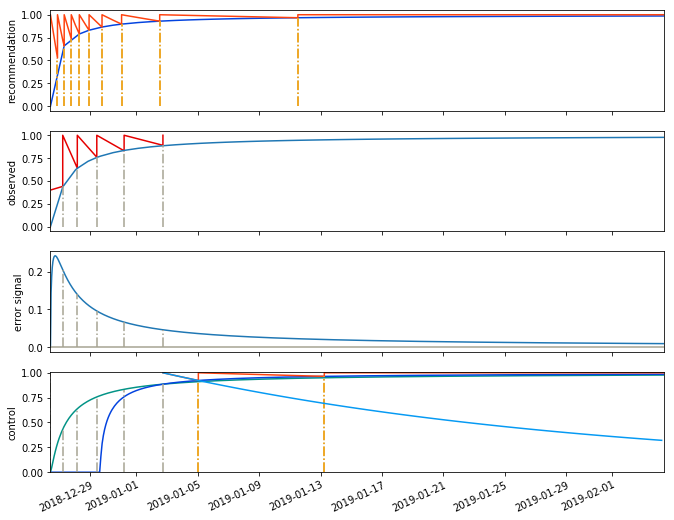

In [11]:
from datetime import datetime
from repetition import pp
from repetition import LearningTracker

# create a learning tracker
lt = LearningTracker(
    epoch=datetime.now(),
)

for d, r in zip( 
    [0,    0.8,  1.75, 3.02, 4.8,  7.33],
    [0.40, 0.44, 0.64, 0.76, 0.83, 0.89],
  ):
  # r: result
  # d: days since training epoch
  lt.learned(result=r, when=d)

# get a set of datetimes
useful_range_of_datetimes = lt.range_for(curve=1, range=10, day_step_size=0.5)

# make a results query using these datetimes
results = [lt.predict_result(moment, curve=1) for moment in useful_range_of_datetimes]
hdl, _ = lt.plot_graphs()

# get the handle for the last subplot so we can draw on it
control_plot = hdl.axarr[-1]
control_plot.plot(useful_range_of_datetimes, results, color='xkcd:azure')

lt.save_figure("./quickstart_control_after_five_events_and_query.png")
lt.save_figure("./quickstart_control_after_five_events_and_query.pdf")
lt.save_figure("./quickstart_control_after_five_events_and_query.svg")

